In [ ]:
import sys
print(sys.executable)


: 

In [44]:
import pandas as pd


In [45]:
# import os

# # Path to your preprocessed.pkl
# PREP_PATH = "/home/tclark/Data Science/multimodal-insurance-project/models/preprocessed.pkl"

# # Load
# preprocessed = joblib.load(PREP_PATH)

# # Print keys (what was saved)
# print("Available keys in preprocessed.pkl:", preprocessed.keys())

# # Example: peek at each
# if "feature_names" in preprocessed:
#     print("\n✅ Feature names used in training:")
#     print(preprocessed["feature_names"][:20], "...")  # show first 20

# if "encoders" in preprocessed:
#     print("\n✅ Encoders saved:")
#     for k, v in preprocessed["encoders"].items():
#         print(f" - {k}: {type(v)}")

# if "embed_sizes" in preprocessed:
#     print("\n✅ Embedding sizes:")
#     print(preprocessed["embed_sizes"])


In [46]:

# Load a subset first (faster exploration)
used_cars_df = pd.read_csv("/home/tclark/Data Science/multimodal-insurance-project/data/used_cars/used_cars_data.csv", nrows=100000)

# Peek
print(used_cars_df.shape)
used_cars_df.head()


(100000, 66)


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [47]:
used_cars_df.isnull().sum().sort_values(ascending=False).head(20)


is_certified               100000
combine_fuel_economy       100000
vehicle_damage_category    100000
bed                         99393
cabin                       98333
is_oemcpo                   93890
bed_length                  91877
bed_height                  91877
is_cpo                      91270
owner_count                 45722
salvage                     43075
theft_title                 43075
frame_damaged               43075
fleet                       43075
has_accidents               43075
isCab                       43075
franchise_make              25416
highway_fuel_economy        16016
city_fuel_economy           16016
torque                      15350
dtype: int64

In [48]:
used_cars_df.columns

Index(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type',
       'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy',
       'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'exterior_color', 'fleet',
       'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height',
       'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab',
       'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length',
       'listed_date', 'listing_color', 'listing_id', 'longitude',
       'main_picture_url', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage',
       'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title',
       'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name',
       'vehicle_damage_category', 'whe

## Dropped columns

In [50]:
# remove columns: bed, cabin, bed_height, bed_length, franchise_make,
# highway_fuel_economy, city_fuel_economy, torque

# one-hot encode body_type column




used_cars_df.drop(columns=['bed', 'cabin', 'bed_height', 'bed_length', 'franchise_make',
       'highway_fuel_economy', 'torque', 'main_picture_url', 'seller_rating', 'dealer_zip',
       'combine_fuel_economy', 'fuel_tank_volume', 'city_fuel_economy', 'power', 'interior_color',
       'major_options', 'engine_displacement', 'horsepower', 'height', 'back_legroom', 'front_legroom',
       'is_certified', 'vehicle_damage_category', 'is_cpo', 'is_oemcpo',
       'trimId','length','width','wheelbase','maximum_seating', 'listing_id', "exterior_color", "interior_color",
       "engine_cylinders"
         ], inplace=True)

used_cars_df.shape


(100000, 33)

In [51]:
used_cars_df.head()

,vin,body_type,city,daysonmarket,description,engine_type,fleet,frame_damaged,franchise_dealer,fuel_type,...,savings_amount,sp_id,sp_name,theft_title,transmission,transmission_display,trim_name,wheel_system,wheel_system_display,year
0,ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,NaN,NaN,True,Gasoline,...,0,370599,Flagship Chrysler,NaN,A,9-Speed Automatic Overdrive,Latitude FWD,FWD,Front-Wheel Drive,2019
1,SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,NaN,NaN,True,Gasoline,...,0,389227,Land Rover San Juan,NaN,A,9-Speed Automatic Overdrive,S AWD,AWD,All-Wheel Drive,2020
2,JF1VA2M67G9829723,Sedan,Guaynabo,1233,NaN,H4,False,False,True,Gasoline,...,0,370467,FIAT de San Juan,False,M,6-Speed Manual,Base,AWD,All-Wheel Drive,2016
3,SALRR2RV0L2433391,SUV / Crossover,San Juan,196,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,NaN,NaN,True,Gasoline,...,0,389227,Land Rover San Juan,NaN,A,8-Speed Automatic Overdrive,V6 HSE AWD,AWD,All-Wheel Drive,2020
4,SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,NaN,NaN,True,Gasoline,...,0,389227,Land Rover San Juan,NaN,A,9-Speed Automatic Overdrive,S AWD,AWD,All-Wheel Drive,2020


In [52]:
# check for null values
used_cars_df.isnull().sum().sort_values(ascending=False).head(20)

owner_count             45722
salvage                 43075
frame_damaged           43075
isCab                   43075
fleet                   43075
has_accidents           43075
theft_title             43075
wheel_system_display     4624
wheel_system             4624
trim_name                3841
mileage                  3557
engine_type              2998
description              2543
fuel_type                2459
transmission             1001
transmission_display     1001
body_type                 401
vin                         0
listing_color               0
listed_date                 0
dtype: int64

In [53]:
# imputations

# --- Binary / Boolean flags: fill missing with 0 (False) ---
used_cars_df['has_accidents']   = used_cars_df['has_accidents'].fillna(0)
used_cars_df['salvage']         = used_cars_df['salvage'].fillna(0)
used_cars_df['frame_damaged']   = used_cars_df['frame_damaged'].fillna(0)
used_cars_df['isCab']           = used_cars_df['isCab'].fillna(0)
used_cars_df['fleet']           = used_cars_df['fleet'].fillna(0)

# --- Categorical flags: fill missing with "Unknown" ---
used_cars_df['theft_title']           = used_cars_df['theft_title'].fillna("Unknown")
used_cars_df['wheel_system']          = used_cars_df['wheel_system'].fillna("Unknown")
used_cars_df['wheel_system_display']  = used_cars_df['wheel_system_display'].fillna("Unknown")
used_cars_df['trim_name']             = used_cars_df['trim_name'].fillna("Unknown")
used_cars_df['engine_type']           = used_cars_df['engine_type'].fillna("Unknown")

used_cars_df['fuel_type']             = used_cars_df['fuel_type'].fillna("Unknown")
used_cars_df['transmission']          = used_cars_df['transmission'].fillna("Unknown")

used_cars_df['body_type']             = used_cars_df['body_type'].fillna("Unknown")
used_cars_df['transmission_display']  = used_cars_df['transmission_display'].fillna("Unknown")
# --- Numeric features: fill with median ---
used_cars_df['mileage']      = used_cars_df['mileage'].fillna(used_cars_df['mileage'].median())
used_cars_df['owner_count']  = used_cars_df['owner_count'].fillna(used_cars_df['owner_count'].median())

# --- Text field: fill with empty string ---
used_cars_df['description']  = used_cars_df['description'].fillna("")


# --- Final sanity check ---
print(used_cars_df.isna().sum().sort_values(ascending=False).head(20))



vin                 0
body_type           0
city                0
daysonmarket        0
description         0
engine_type         0
fleet               0
frame_damaged       0
franchise_dealer    0
fuel_type           0
has_accidents       0
isCab               0
is_new              0
latitude            0
listed_date         0
listing_color       0
longitude           0
make_name           0
mileage             0
model_name          0
dtype: int64


In [54]:
used_cars_df['theft_title'].value_counts(dropna=False)


theft_title
False      56694
Unknown    43075
True         231
Name: count, dtype: int64

In [55]:
# used_cars_df['theft_title'] = used_cars_df['theft_title'].map(
#     {True: "Theft", False: "No Theft"}
# )
# used_cars_df['theft_title'] = used_cars_df['theft_title'].fillna("Unknown")

# used_cars_df['theft_title'].value_counts(dropna=False)

In [56]:
# Example split
low_cardinality = [col for col in used_cars_df.select_dtypes(include=["object"]).columns 
                   if used_cars_df[col].nunique() < 20]

high_cardinality = [col for col in used_cars_df.select_dtypes(include=["object"]).columns 
                    if used_cars_df[col].nunique() >= 20]

print("Low-cardinality categorical:", low_cardinality)
print("High-cardinality categorical:", high_cardinality)


Low-cardinality categorical: ['body_type', 'fleet', 'frame_damaged', 'fuel_type', 'has_accidents', 'isCab', 'listing_color', 'salvage', 'theft_title', 'transmission', 'wheel_system', 'wheel_system_display']
High-cardinality categorical: ['vin', 'city', 'description', 'engine_type', 'listed_date', 'make_name', 'model_name', 'sp_name', 'transmission_display', 'trim_name']


In [57]:
# One-hot encode low-cardinality → ❌ skip, let pipeline handle it
# used_cars_clean = pd.get_dummies(used_cars_df, columns=low_card, drop_first=False)
used_cars_clean = used_cars_df.copy()

# Drop pure ID/noise features
used_cars_clean.drop(columns=['vin', 'sp_name'], inplace=True)

# Convert numeric-like strings
for col in ['length', 'wheelbase', 'width']:
    if col in used_cars_clean.columns:
        # Remove " in" if present
        used_cars_clean[col] = used_cars_clean[col].astype(str).str.replace(" in", "", regex=False)
        # Replace "--" and other non-numeric with NaN
        used_cars_clean[col] = pd.to_numeric(used_cars_clean[col], errors='coerce')

# ❌ Skip frequency encoding too (let pipeline handle make_name, model_name, etc.)
# for col in high_card:
#     freq_map = used_cars_clean[col].value_counts().to_dict()
#     used_cars_clean[col] = used_cars_clean[col].map(freq_map)

# Dates → extract useful info
used_cars_clean['listed_date'] = pd.to_datetime(used_cars_clean['listed_date'], errors='coerce')
used_cars_clean['listed_year'] = used_cars_clean['listed_date'].dt.year
used_cars_clean['listed_month'] = used_cars_clean['listed_date'].dt.month
used_cars_clean.drop(columns=['listed_date'], inplace=True)

print("Final shape:", used_cars_clean.shape)


Final shape: (100000, 32)


In [58]:
used_cars_clean.isna().sum().sort_values(ascending=False).head(15)


body_type           0
city                0
daysonmarket        0
description         0
engine_type         0
fleet               0
frame_damaged       0
franchise_dealer    0
fuel_type           0
has_accidents       0
isCab               0
is_new              0
latitude            0
listing_color       0
longitude           0
dtype: int64

In [59]:
from sklearn.impute import SimpleImputer
import numpy as np


# Fill numeric cols
num_imputer = SimpleImputer(strategy='median')
used_cars_clean['mileage'] = num_imputer.fit_transform(used_cars_clean[['mileage']])
used_cars_clean['owner_count'] = num_imputer.fit_transform(used_cars_clean[['owner_count']])

# Fill categoricals with 'Unknown'
for col in ['engine_type','transmission_display', 'trim_name']:
    used_cars_clean[col] = used_cars_clean[col].fillna("Unknown")

# map fleet to 0/1
used_cars_clean['fleet'] = used_cars_clean['fleet'].map(
    {True: 1, False: 0} 
)


In [60]:
used_cars_clean.isna().sum().sort_values(ascending=False).head(15)

body_type           0
city                0
daysonmarket        0
description         0
engine_type         0
fleet               0
frame_damaged       0
franchise_dealer    0
fuel_type           0
has_accidents       0
isCab               0
is_new              0
latitude            0
listing_color       0
longitude           0
dtype: int64

In [61]:
# drop description for baseline model
used_cars_clean.drop(columns=['description'], inplace=True)

In [62]:
used_cars_clean.head()

,body_type,city,daysonmarket,engine_type,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,isCab,...,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheel_system_display,year,listed_year,listed_month
0,SUV / Crossover,Bayamon,522,I4,0,0,True,Gasoline,0,0,...,370599,Unknown,A,9-Speed Automatic Overdrive,Latitude FWD,FWD,Front-Wheel Drive,2019,2019,4
1,SUV / Crossover,San Juan,207,I4,0,0,True,Gasoline,0,0,...,389227,Unknown,A,9-Speed Automatic Overdrive,S AWD,AWD,All-Wheel Drive,2020,2020,2
2,Sedan,Guaynabo,1233,H4,0,False,True,Gasoline,False,False,...,370467,False,M,6-Speed Manual,Base,AWD,All-Wheel Drive,2016,2017,4
3,SUV / Crossover,San Juan,196,V6,0,0,True,Gasoline,0,0,...,389227,Unknown,A,8-Speed Automatic Overdrive,V6 HSE AWD,AWD,All-Wheel Drive,2020,2020,2
4,SUV / Crossover,San Juan,137,I4,0,0,True,Gasoline,0,0,...,389227,Unknown,A,9-Speed Automatic Overdrive,S AWD,AWD,All-Wheel Drive,2020,2020,4


In [63]:
# veiw price outliers
used_cars_clean['price'].describe()

count    1.000000e+05
mean     3.049952e+04
std      2.091578e+04
min      7.950000e+02
25%      1.799500e+04
50%      2.699500e+04
75%      3.872100e+04
max      1.390000e+06
Name: price, dtype: float64

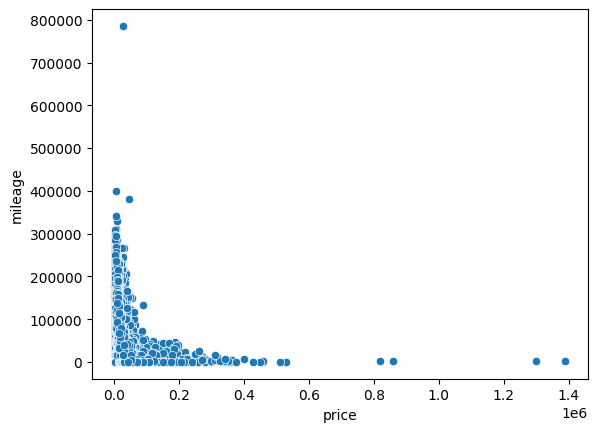

In [64]:
# veiw outliers in a scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='price', y='mileage', data=used_cars_clean)
plt.show()

In [65]:
# remove outliers above 80000
used_cars_clean = used_cars_clean[used_cars_clean['price'].between(used_cars_clean['price'].quantile(0.02), used_cars_clean['price'].quantile(0.98))]


In [66]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Copy dataset
df_clean = used_cars_clean.copy()

# -------------------------------
# Drop noisy free-text fields
# -------------------------------
drop_cols = ['vin', 'sp_name', 'description', 'additional_info']
df_clean = df_clean.drop(columns=[c for c in drop_cols if c in df_clean.columns])

# -------------------------------
# Handle dates
# -------------------------------
if "listed_date" in df_clean.columns:
    df_clean["listed_date"] = pd.to_datetime(df_clean["listed_date"], errors="coerce")
    df_clean["listed_year"] = df_clean["listed_date"].dt.year
    df_clean["listed_month"] = df_clean["listed_date"].dt.month
    df_clean["listed_day"] = df_clean["listed_date"].dt.day
    df_clean = df_clean.drop(columns=["listed_date"])

# -------------------------------
# One-hot encode selected categoricals
# -------------------------------
if "body_type" in df_clean.columns:
    body_dummies = pd.get_dummies(df_clean["body_type"], prefix="body_type").astype(int)
    df_clean = pd.concat([df_clean.drop(columns=["body_type"]), body_dummies], axis=1)

if "engine_type" in df_clean.columns:
    engine_dummies = pd.get_dummies(df_clean["engine_type"], prefix="engine_type").astype(int)
    df_clean = pd.concat([df_clean.drop(columns=["engine_type"]), engine_dummies], axis=1)

if "theft_title" in df_clean.columns:
    theft_dummies = pd.get_dummies(df_clean["theft_title"], prefix="theft_title").astype(int)
    df_clean = pd.concat([df_clean.drop(columns=["theft_title"]), theft_dummies], axis=1)

# -------------------------------
# Convert True/False-like columns to 0/1
# -------------------------------
binary_cols = ["fleet", "frame_damaged", "has_accidents", "isCab", "salvage"]
for col in binary_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.lower().map(
            {"true": 1, "false": 0, "1": 1, "0": 0}
        ).fillna(0).astype(int)

# -------------------------------
# Encode city (frequency encoding)
# -------------------------------
if "city" in df_clean.columns:
    freq_map = df_clean["city"].value_counts().to_dict()
    df_clean["city"] = df_clean["city"].map(freq_map)

# -------------------------------
# Separate numeric and categorical columns
# -------------------------------
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_clean.select_dtypes(include=["object", "category"]).columns

# Impute numeric columns only
imputer = SimpleImputer(strategy="median")
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Fill missing categoricals
df_clean[categorical_cols] = df_clean[categorical_cols].fillna("Unknown")

# -------------------------------
# Target + Features
# -------------------------------
y = df_clean["price"]
X = df_clean.drop(columns=["price"])

print("Numeric columns imputed:", numeric_cols.tolist())
print("Categorical columns filled:", categorical_cols.tolist())


Numeric columns imputed: ['city', 'daysonmarket', 'fleet', 'frame_damaged', 'has_accidents', 'isCab', 'latitude', 'longitude', 'mileage', 'owner_count', 'price', 'salvage', 'savings_amount', 'sp_id', 'year', 'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Unknown', 'body_type_Van', 'body_type_Wagon', 'engine_type_H4', 'engine_type_H4 Hybrid', 'engine_type_H6', 'engine_type_I2', 'engine_type_I3', 'engine_type_I4', 'engine_type_I4 Diesel', 'engine_type_I4 Flex Fuel Vehicle', 'engine_type_I4 Hybrid', 'engine_type_I5', 'engine_type_I5 Biodiesel', 'engine_type_I6', 'engine_type_I6 Diesel', 'engine_type_R2', 'engine_type_Unknown', 'engine_type_V10', 'engine_type_V12', 'engine_type_V6', 'engine_type_V6 Biodiesel', 'engine_type_V6 Diesel', 'engine_type_V6 Flex Fuel Vehicle', 'engine_type_V6 Hybrid', 'engine_type_V8', 'engine_type_V8 Biodiesel', 'engine_type_V8 Compressed

In [67]:

# Preview
df_clean.head()

,city,daysonmarket,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,isCab,is_new,latitude,...,engine_type_V8 Biodiesel,engine_type_V8 Compressed Natural Gas,engine_type_V8 Diesel,engine_type_V8 Flex Fuel Vehicle,engine_type_V8 Hybrid,engine_type_W12,engine_type_W12 Flex Fuel Vehicle,theft_title_False,theft_title_True,theft_title_Unknown
0,31.0,522.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.3988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,55.0,207.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1233.0,0.0,0.0,True,Gasoline,0.0,0.0,False,18.3467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,55.0,196.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,55.0,137.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
print(df_clean["price"].describe())


count    96100.000000
mean     29308.777919
std      14594.335813
min       4999.000000
25%      18491.000000
50%      26995.000000
75%      37999.000000
max      80040.000000
Name: price, dtype: float64


In [69]:
df_clean.head()

,city,daysonmarket,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,isCab,is_new,latitude,...,engine_type_V8 Biodiesel,engine_type_V8 Compressed Natural Gas,engine_type_V8 Diesel,engine_type_V8 Flex Fuel Vehicle,engine_type_V8 Hybrid,engine_type_W12,engine_type_W12 Flex Fuel Vehicle,theft_title_False,theft_title_True,theft_title_Unknown
0,31.0,522.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.3988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,55.0,207.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1233.0,0.0,0.0,True,Gasoline,0.0,0.0,False,18.3467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,55.0,196.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,55.0,137.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Embedded model

In [71]:
# -------------------------------
# Deep Learning with Embeddings (new block)
# -------------------------------
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Choose which categorical columns to embed
embed_cols = ["make_name", "model_name"]

# One-hot columns (small categoricals)
onehot_cols = ["fuel_type", "transmission_display", "trim_name", "city"] #  "exterior_color"

# Numeric columns
num_cols = ["mileage", "owner_count", "daysonmarket", "year", "listed_year", "listed_month", "latitude", "longitude"]
df_clean.head() 

,city,daysonmarket,fleet,frame_damaged,franchise_dealer,fuel_type,has_accidents,isCab,is_new,latitude,...,engine_type_V8 Biodiesel,engine_type_V8 Compressed Natural Gas,engine_type_V8 Diesel,engine_type_V8 Flex Fuel Vehicle,engine_type_V8 Hybrid,engine_type_W12,engine_type_W12 Flex Fuel Vehicle,theft_title_False,theft_title_True,theft_title_Unknown
0,31.0,522.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.3988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,55.0,207.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1233.0,0.0,0.0,True,Gasoline,0.0,0.0,False,18.3467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,55.0,196.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,55.0,137.0,0.0,0.0,True,Gasoline,0.0,0.0,True,18.4439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Make and Model issues

In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# --- embeddings: DO NOT touch df_clean ---
# encoders = {}
# embed_arrays = []
# for col in embed_cols:
#     clean = df_clean[col].astype(str).str.strip().str.lower().to_numpy()
#     le = LabelEncoder().fit(clean)
#     encoders[col] = le
#     embed_arrays.append(le.transform(clean))  # <-- arrays only, no df_clean[col] = ...

from sklearn.preprocessing import LabelEncoder

# Match preprocess.py behavior
encoders = {}
for col in ["make_name", "model_name"]:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    encoders[col] = le

# Now your embed columns match preprocess.py
X_embed = df_clean[["make_name", "model_name"]].values


# build X_embed from the arrays you just made
X_embed = np.column_stack(embed_arrays).astype(np.int64)


df_clean.head() 

NameError: name 'embed_arrays' is not defined

In [ ]:
# One-hot encode smaller categoricals (without mutating df_clean)
onehot_enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
onehot_df = df_clean[onehot_cols].astype(str).apply(lambda s: s.str.strip().str.lower())
onehot_data = onehot_enc.fit_transform(onehot_df).astype(np.float32)

# Combine numeric + one-hot (embeddings handled separately in model)
X_num = df_clean[num_cols].to_numpy(dtype=np.float32)
X_other = np.hstack([X_num, onehot_data]).astype(np.float32)
y = df_clean["price"].to_numpy(dtype=np.float32)

# Train/val split (assumes X_embed was created earlier in a previous block)
from sklearn.model_selection import train_test_split
X_embed_train, X_embed_val, X_other_train, X_other_val, y_train, y_val = train_test_split(
    X_embed, X_other, y, test_size=0.2, random_state=42
)

df_clean.head()


In [ ]:

# Dataset
class CarDataset(Dataset):
    def __init__(self, embed_data, other_data, y):
        self.embed_data = torch.tensor(embed_data, dtype=torch.long)
        self.other_data = torch.tensor(other_data, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1,1)

    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.embed_data[idx], self.other_data[idx], self.y[idx]

train_ds = CarDataset(X_embed_train, X_other_train, y_train)
val_ds   = CarDataset(X_embed_val, X_other_val, y_val)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
val_dl   = DataLoader(val_ds, batch_size=64)
df_clean.head() 

In [ ]:

# Embedding sizes (rule: ~min(50, n_cat//2))
embed_sizes = [(int(df_clean[col].nunique()), min(20, df_clean[col].nunique()//2)) for col in embed_cols]

# Model
class CarModel(nn.Module):
    def __init__(self, embed_sizes, n_other):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(cat, dim) for cat, dim in embed_sizes])
        self.fc1 = nn.Linear(sum(dim for _, dim in embed_sizes) + n_other, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x_embed, x_other):
        embs = [emb(x_embed[:,i]) for i, emb in enumerate(self.embeds)]
        x = torch.cat(embs + [x_other], dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

model = CarModel(embed_sizes, X_other.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
df_clean.head() 

In [ ]:

# Training loop
for epoch in range(10):
    model.train()
    for xb_embed, xb_other, yb in train_dl:
        optimizer.zero_grad()
        preds = model(xb_embed, xb_other)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for xb_embed, xb_other, yb in val_dl:
            preds = model(xb_embed, xb_other)
            val_losses.append(criterion(preds, yb).item())
    print(f"Epoch {epoch+1} Val Loss: {np.mean(val_losses):.2f}")
df_clean.head() 

In [ ]:
MODEL_PATH = "/home/tclark/Data Science/multimodal-insurance-project/models/deep_model.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f"✅ Model saved to {MODEL_PATH}")


In [ ]:
df_clean.to_csv(
    "/home/tclark/Data Science/multimodal-insurance-project/data/used_cars/used_cars_data_clean.csv",
    index=False
)



